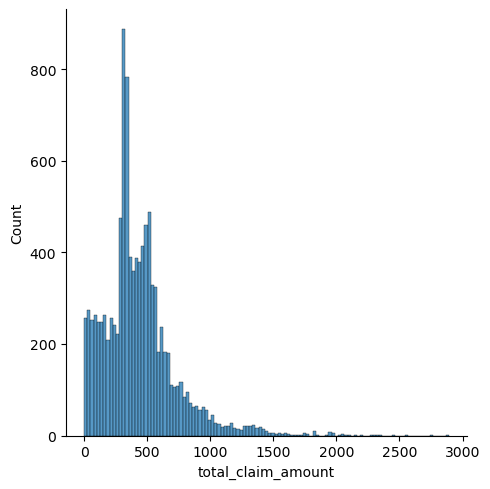

In [118]:
# Linear Regression

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
#df.dropna(inplace=True)
sns.displot(df['total_claim_amount'])

In [119]:
numerical = df.select_dtypes(include=np.number)
numerical.dropna(inplace=True)
X = numerical.drop('total_claim_amount', axis=1)
y = numerical['total_claim_amount']
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test

3487      120
668       660
10315     244
5332       86
1523     1032
         ... 
7089      285
2507      494
7965      537
8523      446
9803      404
Name: total_claim_amount, Length: 2138, dtype: int64

In [121]:
scaler = MinMaxScaler()
scaler.fit(np.array(X_train))
X_train_scaled = scaler.transform(np.array(X_train))

In [122]:
lm = LinearRegression() # fit_intercept = True
model = lm.fit(X_train_scaled,y_train)

model.intercept_
model.coef_

array([-7.86172127e+01, -1.22106613e+02,  1.29382217e+03,  4.41837395e-01,
       -1.06768836e+01,  1.59304967e+00,  8.02921718e+00])

In [123]:
X_test_scaled = scaler.transform(np.array(X_test))
y_pred = model.predict(X_test_scaled).reshape(1,-1)[0]

In [124]:
residuals = np.array(y_test - y_pred)
res_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'residual':residuals})
res_df

,y_test,y_pred,residual
3487,120,230.080624,-110.080624
668,660,559.062818,100.937182
10315,244,340.972244,-96.972244
5332,86,268.949617,-182.949617
1523,1032,1104.937431,-72.937431
...,...,...,...
7089,285,493.750706,-208.750706
2507,494,462.964323,31.035677
7965,537,490.612535,46.387465
8523,446,463.725456,-17.725456


In [125]:
mse(y_test,y_pred)
np.sqrt(mse(y_test,y_pred))

220.4614597918546

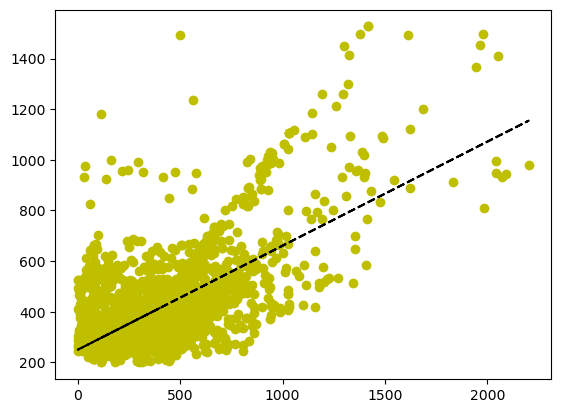

In [126]:
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, y_pred, 'yo', y_test, m*y_test+b, '--k')
plt.show()

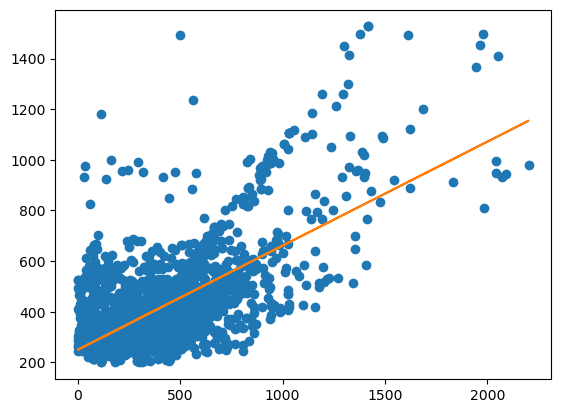

In [127]:
plt.plot(y_test, y_pred, 'o')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test+b)